In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load data

train_data = pd.read_csv('D:/Kuliah/SEM 6/BahasaAlami/UTS/data/train_preprocess.csv', sep=',')
val_data = pd.read_csv('D:/Kuliah/SEM 6/BahasaAlami/UTS/data/valid_preprocess.csv', sep=',')
test_data = pd.read_csv('D:/Kuliah/SEM 6/BahasaAlami/UTS/data/test_preprocess.csv', sep=',')

print('Train Data: ', train_data.shape)
print('Validation Data : ', val_data.shape)
print('Test Data: ', test_data.shape)

Train Data:  (810, 7)
Validation Data :  (90, 7)
Test Data:  (180, 7)


In [3]:
# labels = ['fuel', 'machine', 'others', 'part', 'price', 'service']

# train_encoded = pd.get_dummies(train_data, columns=labels, dtype=int)
# val_encoded = pd.get_dummies(val_data, columns=labels, dtype=int)
# test_encoded = pd.get_dummies(test_data, columns=labels, dtype=int)

In [4]:
train_data.head()

,Sentence,fuel,machine,others,part,price,service
0,Kuring make 2014 Honda Jazz GK5 (mimiti dibuka...,neutral,neutral,positive,neutral,neutral,neutral
1,Kunaon Avanza boros bensin kitu? Karék dieusia...,negative,neutral,neutral,neutral,neutral,neutral
2,"Saran kuring sareng pangalaman kuring, langkun...",positive,positive,neutral,neutral,neutral,neutral
3,"Tina segi harga, Pajero ogé 30 juta langkung m...",neutral,neutral,neutral,neutral,positive,neutral
4,Pajero mah ngeunah,neutral,neutral,positive,neutral,neutral,neutral


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  810 non-null    object
 1   fuel      810 non-null    object
 2   machine   810 non-null    object
 3   others    810 non-null    object
 4   part      810 non-null    object
 5   price     810 non-null    object
 6   service   810 non-null    object
dtypes: object(7)
memory usage: 44.4+ KB


In [6]:
train_data.describe

<bound method NDFrame.describe of                                               Sentence      fuel   machine  \
0    Kuring make 2014 Honda Jazz GK5 (mimiti dibuka...   neutral   neutral   
1    Kunaon Avanza boros bensin kitu? Karék dieusia...  negative   neutral   
2    Saran kuring sareng pangalaman kuring, langkun...  positive  positive   
3    Tina segi harga, Pajero ogé 30 juta langkung m...   neutral   neutral   
4                                   Pajero mah ngeunah   neutral   neutral   
..                                                 ...       ...       ...   
805      Naek Pajero oyag-oyag, leuwih hade naek Inova   neutral   neutral   
806  Pangalaman nyetir pisan pikaresepeun ngagunake...   neutral  positive   
807                    Agya rada nguciwakeun, teu alus   neutral   neutral   
808  Lian ti hargana anu murah, motor otomatis Vari...  positive   neutral   
809  Kalayan harga anu lumayan ekonomis, gaya awak ...   neutral   neutral   

       others      part     p

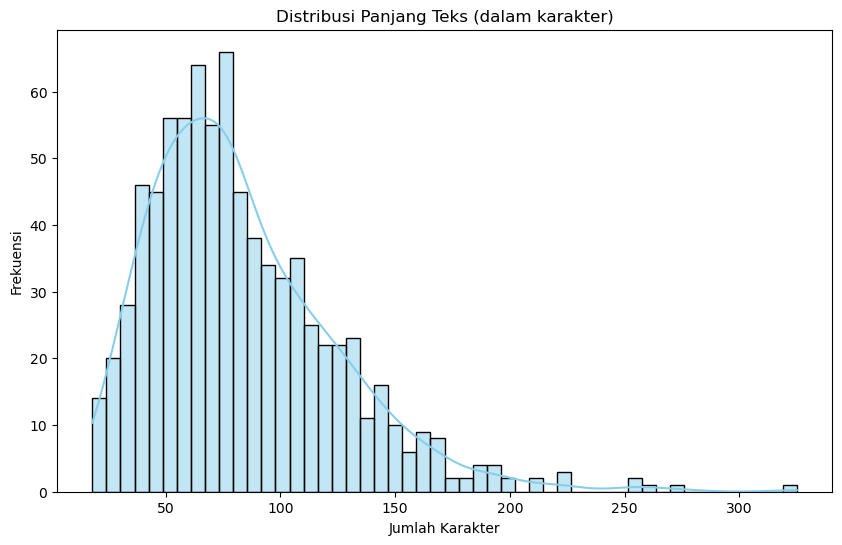

In [7]:
train_data['text_length'] = train_data['Sentence'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Panjang Teks (dalam karakter)')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

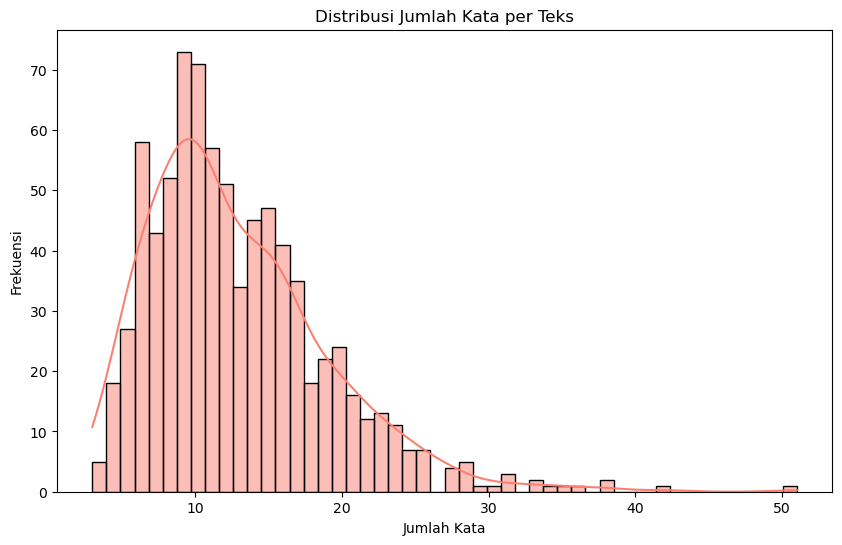

In [8]:
train_data['word_count'] = train_data['Sentence'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_data['word_count'], bins=50, kde=True, color='salmon')
plt.title('Distribusi Jumlah Kata per Teks')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

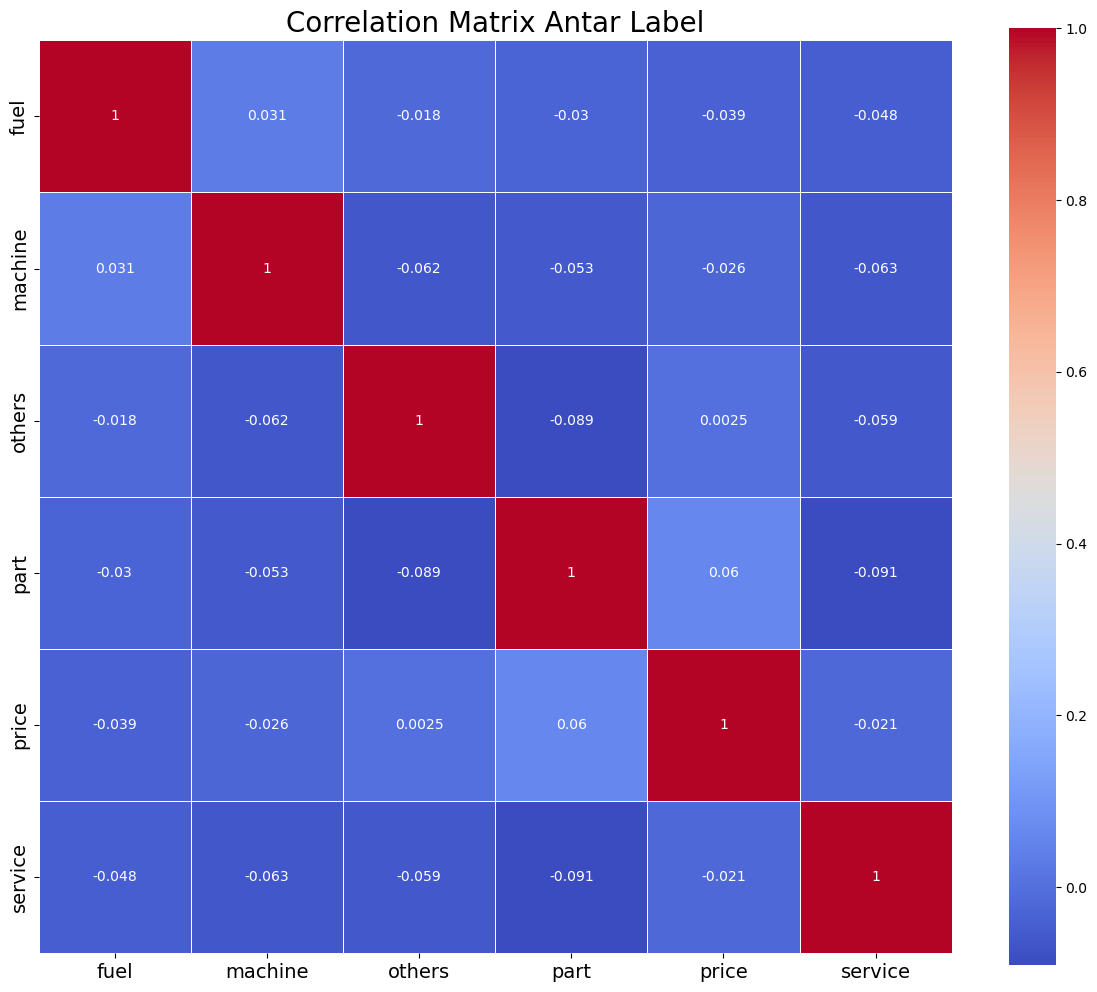

In [9]:
label_cols = ['fuel', 'machine', 'others', 'part', 'price', 'service']

for col in label_cols:
    if train_data[col].dtype == 'object':
        lb = LabelBinarizer()
        train_data[col] = lb.fit_transform(train_data[col])
    else:
        train_data[col] = pd.to_numeric(train_data[col], errors='coerce')

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[label_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix Antar Label', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re
import string
from sklearn.preprocessing import MultiLabelBinarizer

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

for df in [train_data, val_data, test_data]:
    df['clean_text'] = df['Sentence'].fillna('').apply(clean_text)

label_columns = ['fuel', 'machine', 'others', 'part', 'price', 'service']

def extract_labels(row):
    return [col for col in label_columns if str(row[col]).lower() == 'positive']

train_label_list = train_data[label_columns].apply(extract_labels, axis=1)
val_label_list = val_data[label_columns].apply(extract_labels, axis=1)
test_label_list = test_data[label_columns].apply(extract_labels, axis=1)

mlb = MultiLabelBinarizer()

train_labels = mlb.fit_transform(train_label_list)
val_labels = mlb.transform(val_label_list)
test_labels = mlb.transform(test_label_list)

train_data['label_list'] = train_label_list
val_data['label_list'] = val_label_list
test_data['label_list'] = test_label_list

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['fuel', 'machine', 'others', 'part', 'price', 'service'] will be ignored
  warnings.warn(


In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

stemmer = StemmerFactory().create_stemmer()
wpt = nltk.WordPunctTokenizer()
stopword_factory = StopWordRemoverFactory()

def uncapitalize(doc):
 return doc.lower()
 
def normalize_document(doc):
 doc = uncapitalize(doc)
 doc = re.sub(r"[^a-zA-Z\s]", "", doc, re.I | re.A)
 doc = doc.strip()
 doc = wpt.tokenize(doc)
 doc = [stemmer.stem(word) for word in doc]
 doc = " ".join(doc)
 return doc
normalize_corpus = np.vectorize(normalize_document)

In [14]:
norm_corpus = normalize_corpus(list(df['Sentence']))

df['clean_sentence'] = norm_corpus
df.to_csv('train_preprocess_stemmed.csv', index=False)
df.head()

,Sentence,fuel,machine,others,part,price,service,clean_text,label_list,clean_sentence
0,Terios pang gagahna. Komo deui upami warna beu...,neutral,neutral,positive,positive,neutral,neutral,terios pang gagahna komo deui upami warna beur...,"[others, part]",terios pang gagahna komo deui upam warna beure...
1,"Abdi maké Mobilio. Numutkeun abdi, leres pisan...",neutral,neutral,positive,neutral,neutral,neutral,abdi maké mobilio numutkeun abdi leres pisan f...,[others],abdi mak mobilio numutkeun abdi les pis fun to...
2,"Sanajan desainna sporty, lamun tingkat kanyama...",neutral,neutral,negative,positive,neutral,neutral,sanajan desainna sporty lamun tingkat kanyaman...,[part],sanajan desainna sporty lamun tingkat kanyaman...
3,Xpander laris pisan di pasar Indonesia,neutral,neutral,positive,neutral,neutral,neutral,xpander laris pisan di pasar indonesia,[others],xpander laris pis di pasar indonesia
4,"Lamun rék sadayana nyaman, maké Avanza wé, akang.",neutral,neutral,positive,neutral,neutral,neutral,lamun rék sadayana nyaman maké avanza wé akang,[others],lamun rk sadayana nyaman mak avanza w akang


In [15]:
df['clean_sentence'] = norm_corpus
df.head()

,Sentence,fuel,machine,others,part,price,service,clean_text,label_list,clean_sentence
0,Terios pang gagahna. Komo deui upami warna beu...,neutral,neutral,positive,positive,neutral,neutral,terios pang gagahna komo deui upami warna beur...,"[others, part]",terios pang gagahna komo deui upam warna beure...
1,"Abdi maké Mobilio. Numutkeun abdi, leres pisan...",neutral,neutral,positive,neutral,neutral,neutral,abdi maké mobilio numutkeun abdi leres pisan f...,[others],abdi mak mobilio numutkeun abdi les pis fun to...
2,"Sanajan desainna sporty, lamun tingkat kanyama...",neutral,neutral,negative,positive,neutral,neutral,sanajan desainna sporty lamun tingkat kanyaman...,[part],sanajan desainna sporty lamun tingkat kanyaman...
3,Xpander laris pisan di pasar Indonesia,neutral,neutral,positive,neutral,neutral,neutral,xpander laris pisan di pasar indonesia,[others],xpander laris pis di pasar indonesia
4,"Lamun rék sadayana nyaman, maké Avanza wé, akang.",neutral,neutral,positive,neutral,neutral,neutral,lamun rék sadayana nyaman maké avanza wé akang,[others],lamun rk sadayana nyaman mak avanza w akang


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(min_df=0.,max_df=1.)
cv_matrix =cv.fit_transform(df['clean_sentence'])
cv_matrix

<180x744 sparse matrix of type '<class 'numpy.int64'>'
	with 1952 stored elements in Compressed Sparse Row format>

In [17]:
print(cv_matrix)

  (0, 680)	1
  (0, 518)	1
  (0, 179)	1
  (0, 319)	1
  (0, 134)	1
  (0, 719)	1
  (0, 731)	1
  (0, 81)	1
  (0, 405)	1
  (1, 0)	2
  (1, 382)	1
  (1, 422)	1
  (1, 480)	1
  (1, 360)	1
  (1, 546)	1
  (1, 176)	1
  (1, 700)	1
  (1, 151)	1
  (1, 566)	1
  (1, 146)	1
  (2, 566)	1
  (2, 611)	1
  (2, 132)	1
  (2, 648)	1
  (2, 346)	1
  :	:
  (177, 683)	1
  (177, 660)	1
  (177, 337)	1
  (177, 678)	1
  (177, 141)	1
  (177, 600)	1
  (177, 645)	1
  (177, 9)	1
  (178, 95)	1
  (178, 103)	1
  (178, 142)	1
  (178, 337)	1
  (178, 690)	1
  (178, 570)	1
  (178, 209)	1
  (178, 327)	1
  (179, 500)	1
  (179, 238)	1
  (179, 237)	1
  (179, 686)	1
  (179, 51)	1
  (179, 55)	1
  (179, 252)	1
  (179, 455)	1
  (179, 153)	1


In [18]:
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)

,abdi,ac,acan,adem,aerox,ageung,agya,ahass,ahirna,airbags,...,wuling,xenia,xexi,xgear,xpander,xride,xv,yahama,yamaha,yn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(df['clean_sentence'])
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,abdi akhirakhir,abdi bak,abdi bda,abdi dibuktikeun,abdi gaduh,abdi hanjakal,abdi henteu,abdi langkung,abdi les,abdi mah,...,yamaha lexi,yamaha mah,yamaha mio,yamaha nmax,yamaha nu,yamaha ti,yamaha vega,yn mesin,yn ta,yn teu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,abdi,ac,acan,adem,aerox,ageung,agya,ahass,ahirna,airbags,...,wuling,xenia,xexi,xgear,xpander,xride,xv,yahama,yamaha,yn
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.37,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
176,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
177,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
178,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(df['clean_sentence'])
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,abdi,ac,acan,adem,aerox,ageung,agya,ahass,ahirna,airbags,...,wuling,xenia,xexi,xgear,xpander,xride,xv,yahama,yamaha,yn
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.37,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
176,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
177,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
178,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [26]:
unique_words = list(
 set([word for doc in [doc.split() for doc in df['clean_sentence']] for word in doc]))

def_feature_dict = {w: 0 for w in unique_words}
print(def_feature_dict)

{'pang': 0, 'nyaman': 0, 'bensin': 0, 'canggih': 0, 'jelas': 0, 'serah': 0, 'kirang': 0, 'nyaring': 0, 'spsifikasi': 0, 'harga': 0, 'airbags': 0, 'bungah': 0, 'jin': 0, 'mawa': 0, 'metalik': 0, 'pertama': 0, 'sabungkus': 0, 'klaksonna': 0, 'vega': 0, 'aman': 0, 'saing': 0, 'lumayan': 0, 'cat': 0, 'x': 0, 'force': 0, 'dipirig': 0, 'hayang': 0, 'fitur': 0, 'pagaweanana': 0, 'kuring': 0, 'les': 0, 'lapak': 0, 'kedah': 0, 'satria': 0, 'tank': 0, 'ngantri': 0, 'keneh': 0, 'yn': 0, 'saku': 0, 'jalanjalan': 0, 'resep': 0, 'sapopoe': 0, 'ngabeledug': 0, 'tinggi': 0, 'pak': 0, 'juta': 0, 'pangsi': 0, 'ku': 0, 'modis': 0, 'unggal': 0, 'xenia': 0, 'pas': 0, 'nu': 0, 'lega': 0, 'ngajantenkeun': 0, 'produksi': 0, 'sami': 0, 'sumuhun': 0, 'khususna': 0, 'tambah': 0, 'freed': 0, 'nyangkut': 0, 'kaamanan': 0, 'wa': 0, 'mineral': 0, 'daya': 0, 'sababna': 0, 'parah': 0, 'cbr': 0, 'na': 0, 'saminggu': 0, 'lemah': 0, 'tknologi': 0, 'masarakat': 0, 'rk': 0, 'ragu': 0, 'kendara': 0, 'jok': 0, 'impressive': 

In [28]:
from gensim.models import Word2Vec
import numpy as np
tokenized_texts = [text.split() for text in df['clean_sentence']]  

w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv]
    return np.mean(w2v_model.wv[doc], axis=0) if doc else np.zeros(100)

X = np.array([document_vector(doc) for doc in tokenized_texts])


SVM with Bag of Words - Cross-Validation Accuracy: nan ± nan
SVM with Bag of Words Final Subset Accuracy: 0.18888888888888888
SVM with Bag of Words Hamming Loss: Not supported for multiclass-multioutput labels.
SVM with Bag of Words Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.88      0.99      0.93       149
           2       0.83      0.48      0.61        21

    accuracy                           0.88       180
   macro avg       0.90      0.49      0.51       180
weighted avg       0.88      0.88      0.84       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.85      1.00      0.92       137
           2       0.56      0.34      0.43        29

    accuracy                           0.82       180
   macro avg       0.80      0.45      0.45       180
weighted a

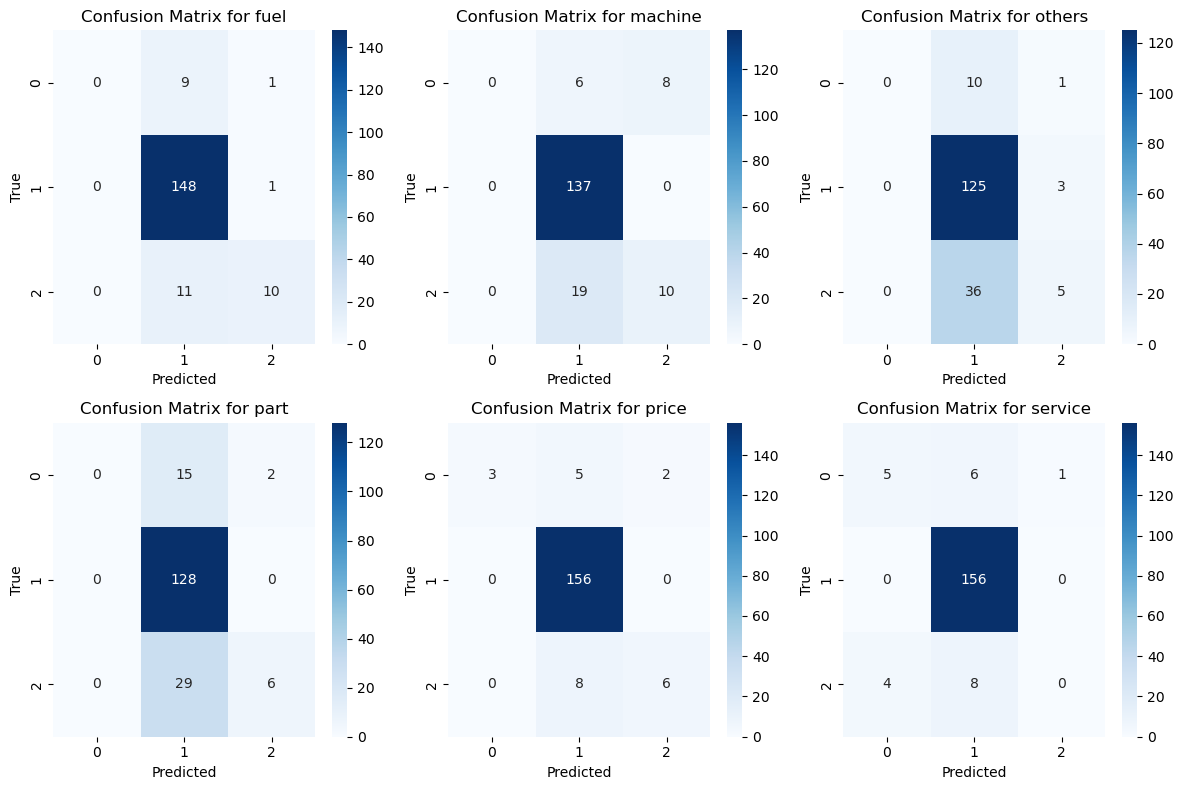

KNN with Bag of Words - Cross-Validation Accuracy: nan ± nan
KNN with Bag of Words Final Subset Accuracy: 0.15555555555555556
KNN with Bag of Words Hamming Loss: Not supported for multiclass-multioutput labels.
KNN with Bag of Words Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.85      1.00      0.92       149
           2       0.80      0.19      0.31        21

    accuracy                           0.85       180
   macro avg       0.88      0.40      0.41       180
weighted avg       0.85      0.85      0.80       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.77      1.00      0.87       137
           2       1.00      0.03      0.07        29

    accuracy                           0.78       180
   macro avg       0.92      0.39      0.40       180
weighted a

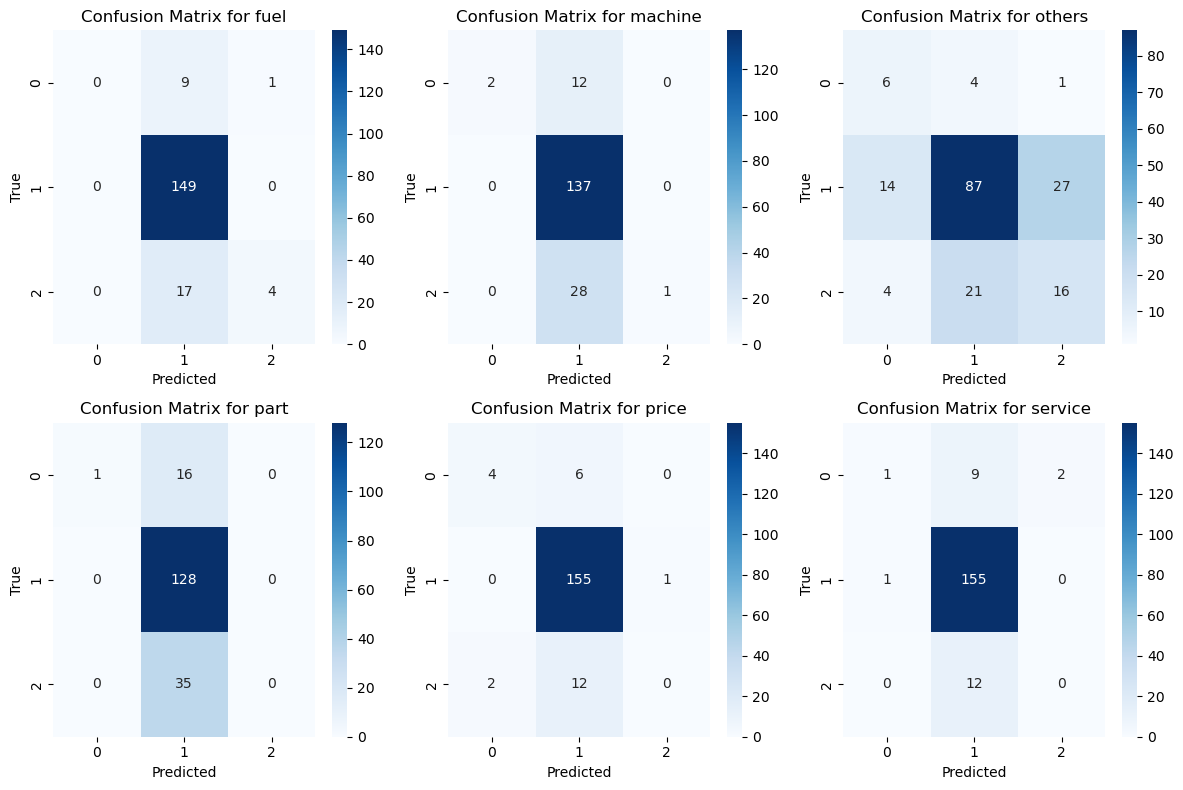

NB with Bag of Words - Cross-Validation Accuracy: nan ± nan
NB with Bag of Words Final Subset Accuracy: 0.2611111111111111
NB with Bag of Words Hamming Loss: Not supported for multiclass-multioutput labels.
NB with Bag of Words Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.94      0.99      0.96       149
           2       0.73      0.76      0.74        21

    accuracy                           0.91       180
   macro avg       0.89      0.59      0.57       180
weighted avg       0.92      0.91      0.88       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.88      0.98      0.92       137
           2       0.62      0.55      0.58        29

    accuracy                           0.84       180
   macro avg       0.83      0.53      0.55       180
weighted avg   

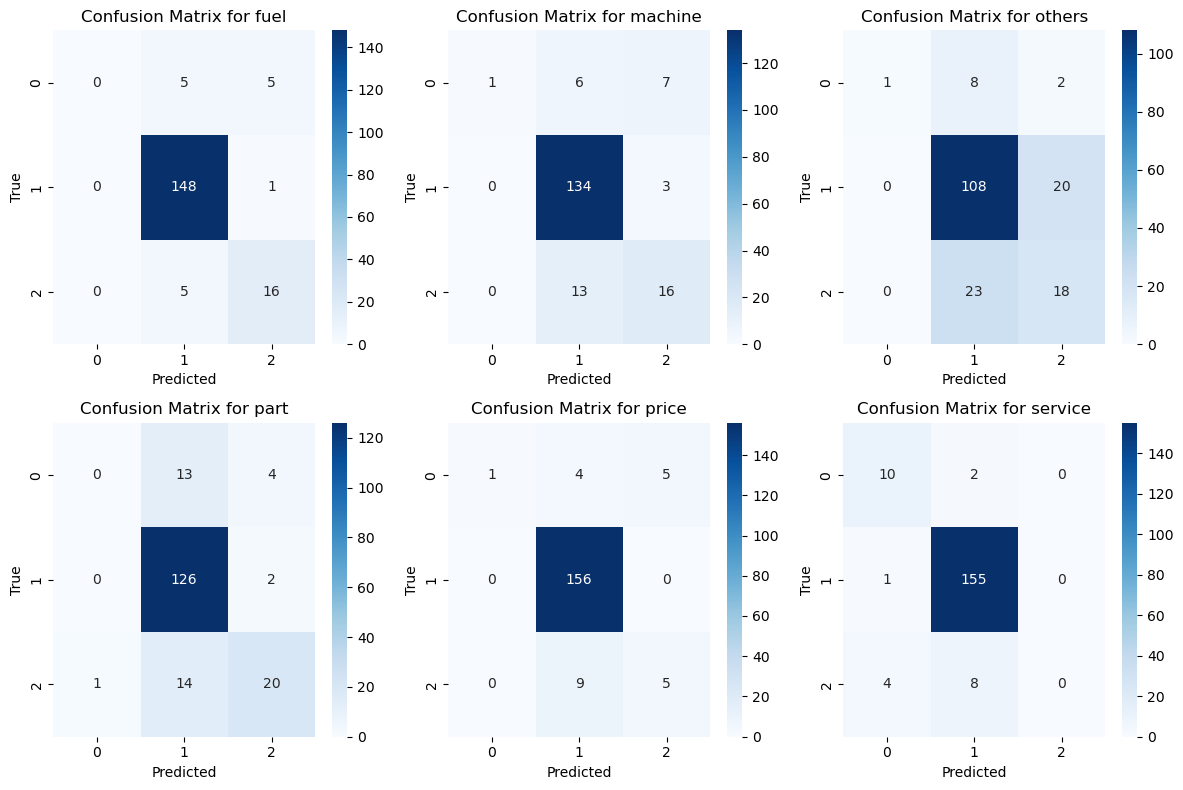

SVM with Bag of N-grams - Cross-Validation Accuracy: nan ± nan
SVM with Bag of N-grams Final Subset Accuracy: 0.13333333333333333
SVM with Bag of N-grams Hamming Loss: Not supported for multiclass-multioutput labels.
SVM with Bag of N-grams Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.87      1.00      0.93       149
           2       0.88      0.33      0.48        21

    accuracy                           0.87       180
   macro avg       0.91      0.44      0.47       180
weighted avg       0.87      0.87      0.82       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.82      1.00      0.90       137
           2       0.54      0.24      0.33        29

    accuracy                           0.80       180
   macro avg       0.79      0.41      0.41       180
we

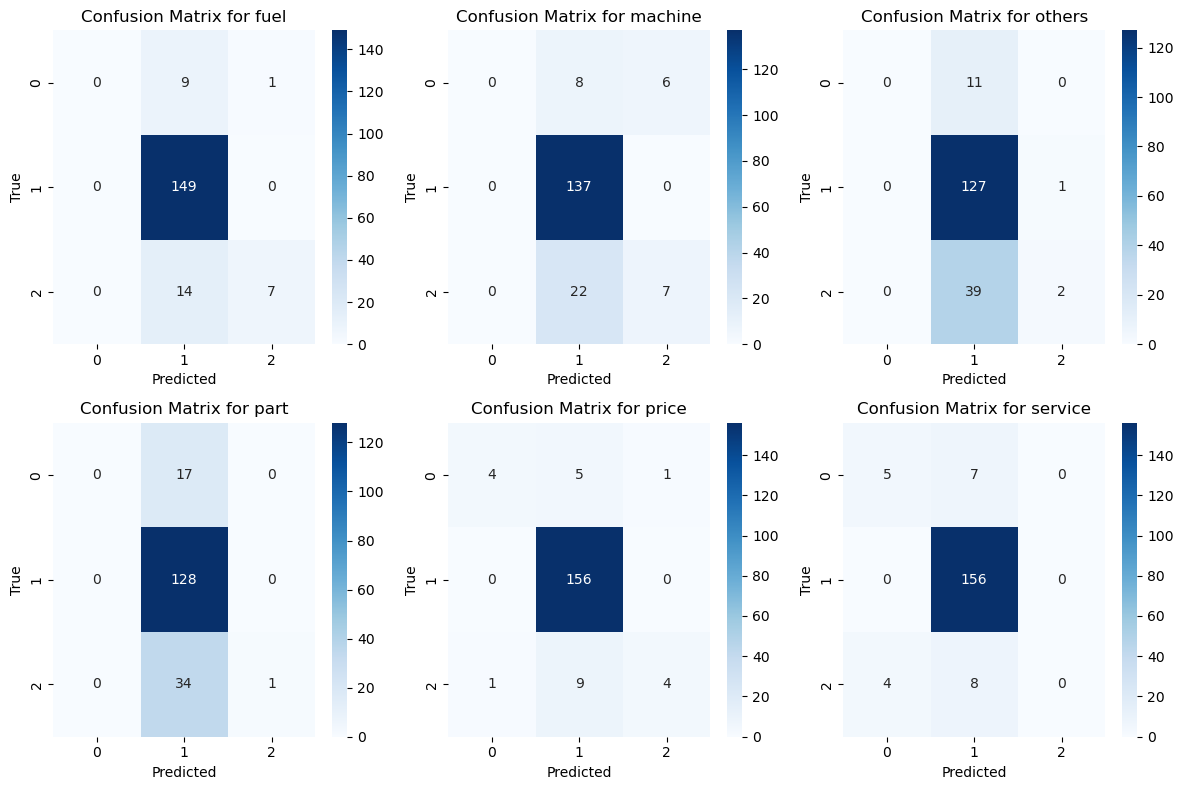

KNN with Bag of N-grams - Cross-Validation Accuracy: nan ± nan
KNN with Bag of N-grams Final Subset Accuracy: 0.044444444444444446
KNN with Bag of N-grams Hamming Loss: Not supported for multiclass-multioutput labels.
KNN with Bag of N-grams Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.84      1.00      0.91       149
           2       1.00      0.14      0.25        21

    accuracy                           0.84       180
   macro avg       0.95      0.38      0.39       180
weighted avg       0.87      0.84      0.79       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.76      1.00      0.86       137
           2       1.00      0.00      0.00        29

    accuracy                           0.76       180
   macro avg       0.92      0.33      0.29       180
w

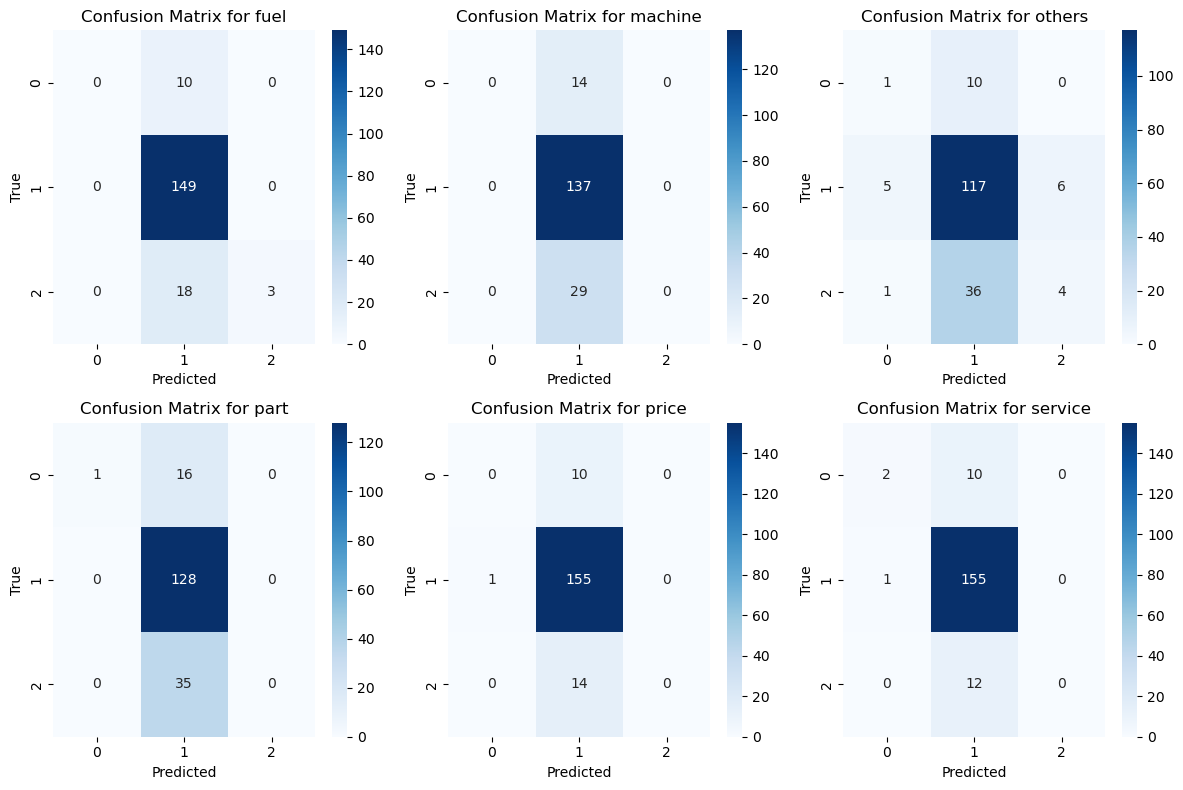

NB with Bag of N-grams - Cross-Validation Accuracy: nan ± nan
NB with Bag of N-grams Final Subset Accuracy: 0.21666666666666667
NB with Bag of N-grams Hamming Loss: Not supported for multiclass-multioutput labels.
NB with Bag of N-grams Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.94      0.99      0.96       149
           2       0.68      0.71      0.70        21

    accuracy                           0.91       180
   macro avg       0.87      0.60      0.61       180
weighted avg       0.91      0.91      0.89       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.86      0.99      0.92       137
           2       0.60      0.41      0.49        29

    accuracy                           0.83       180
   macro avg       0.82      0.49      0.51       180
weight

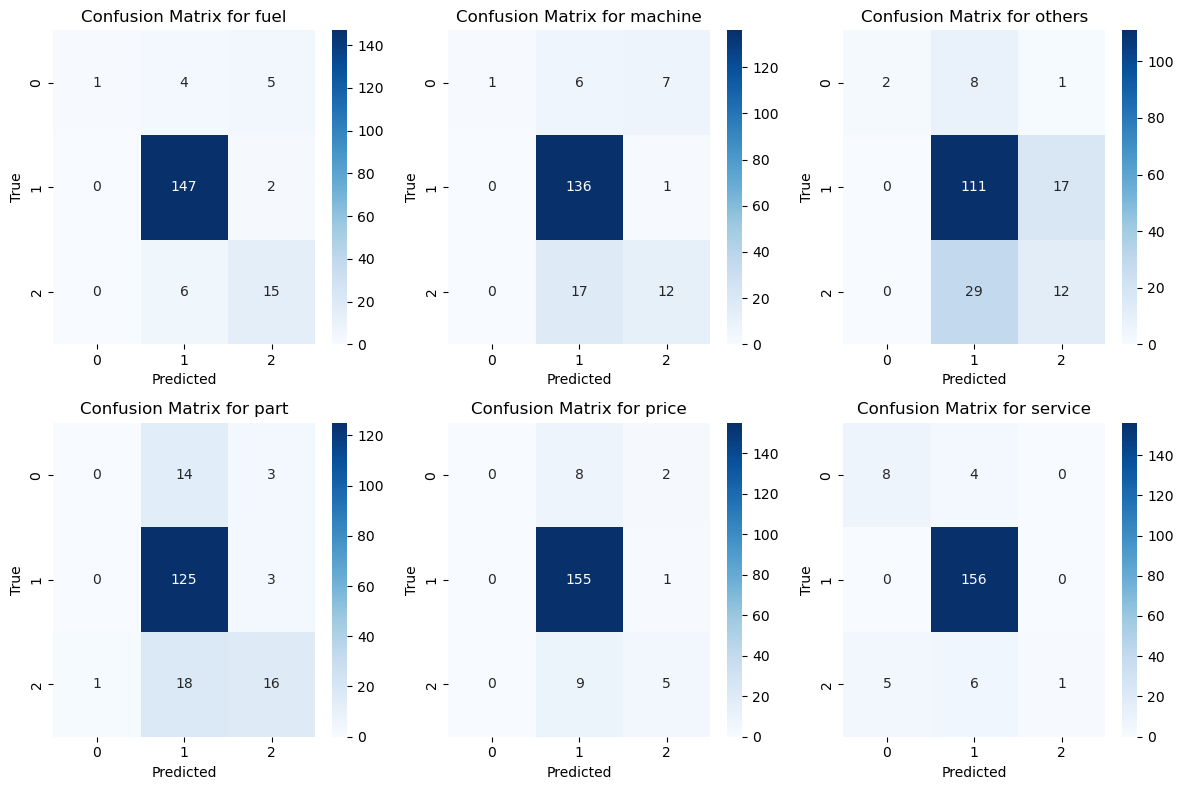

SVM with TF-IDF - Cross-Validation Accuracy: nan ± nan
SVM with TF-IDF Final Subset Accuracy: 0.15555555555555556
SVM with TF-IDF Hamming Loss: Not supported for multiclass-multioutput labels.
SVM with TF-IDF Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.88      1.00      0.93       149
           2       0.80      0.38      0.52        21

    accuracy                           0.87       180
   macro avg       0.89      0.46      0.48       180
weighted avg       0.87      0.87      0.83       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.82      1.00      0.90       137
           2       0.62      0.28      0.38        29

    accuracy                           0.81       180
   macro avg       0.81      0.43      0.43       180
weighted avg       0.80      0.81 

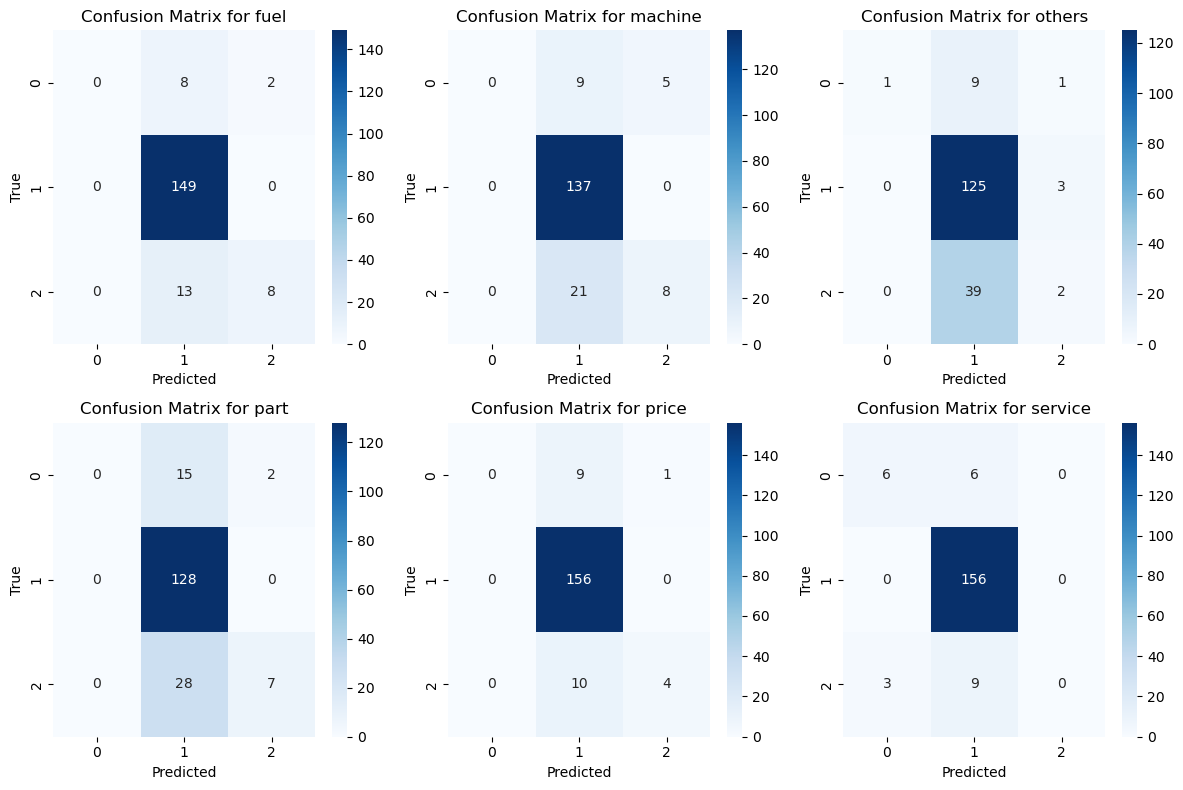

KNN with TF-IDF - Cross-Validation Accuracy: nan ± nan
KNN with TF-IDF Final Subset Accuracy: 0.19444444444444445
KNN with TF-IDF Hamming Loss: Not supported for multiclass-multioutput labels.
KNN with TF-IDF Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.89      1.00      0.94       149
           2       0.89      0.38      0.53        21

    accuracy                           0.89       180
   macro avg       0.93      0.59      0.68       180
weighted avg       0.90      0.89      0.87       180

Label: machine
              precision    recall  f1-score   support

           0       0.60      0.21      0.32        14
           1       0.80      0.98      0.88       137
           2       0.62      0.17      0.27        29

    accuracy                           0.79       180
   macro avg       0.68      0.45      0.49       180
weighted avg       0.76      0.79 

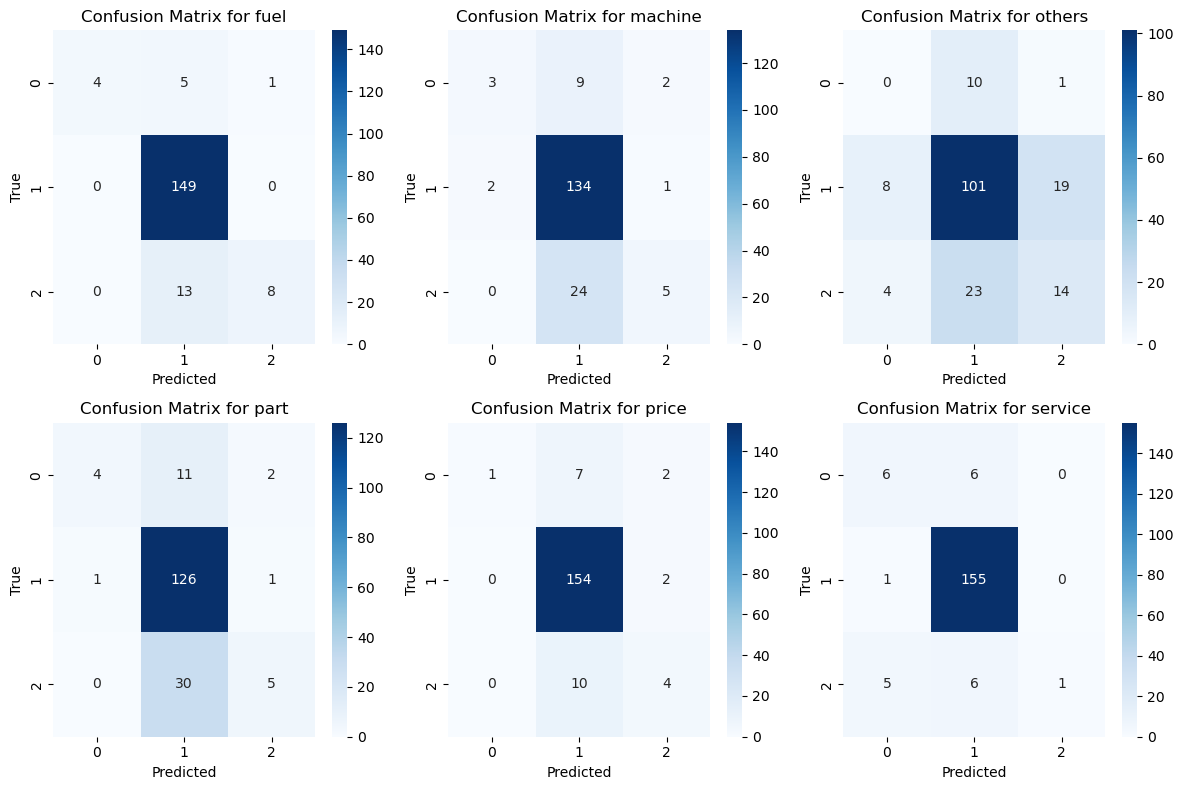

NB with TF-IDF - Cross-Validation Accuracy: nan ± nan
NB with TF-IDF Final Subset Accuracy: 0.016666666666666666
NB with TF-IDF Hamming Loss: Not supported for multiclass-multioutput labels.
NB with TF-IDF Classification Report:
Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.83      1.00      0.91       149
           2       1.00      0.05      0.09        21

    accuracy                           0.83       180
   macro avg       0.94      0.35      0.33       180
weighted avg       0.86      0.83      0.76       180

Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.76      1.00      0.86       137
           2       1.00      0.00      0.00        29

    accuracy                           0.76       180
   macro avg       0.92      0.33      0.29       180
weighted avg       0.82      0.76    

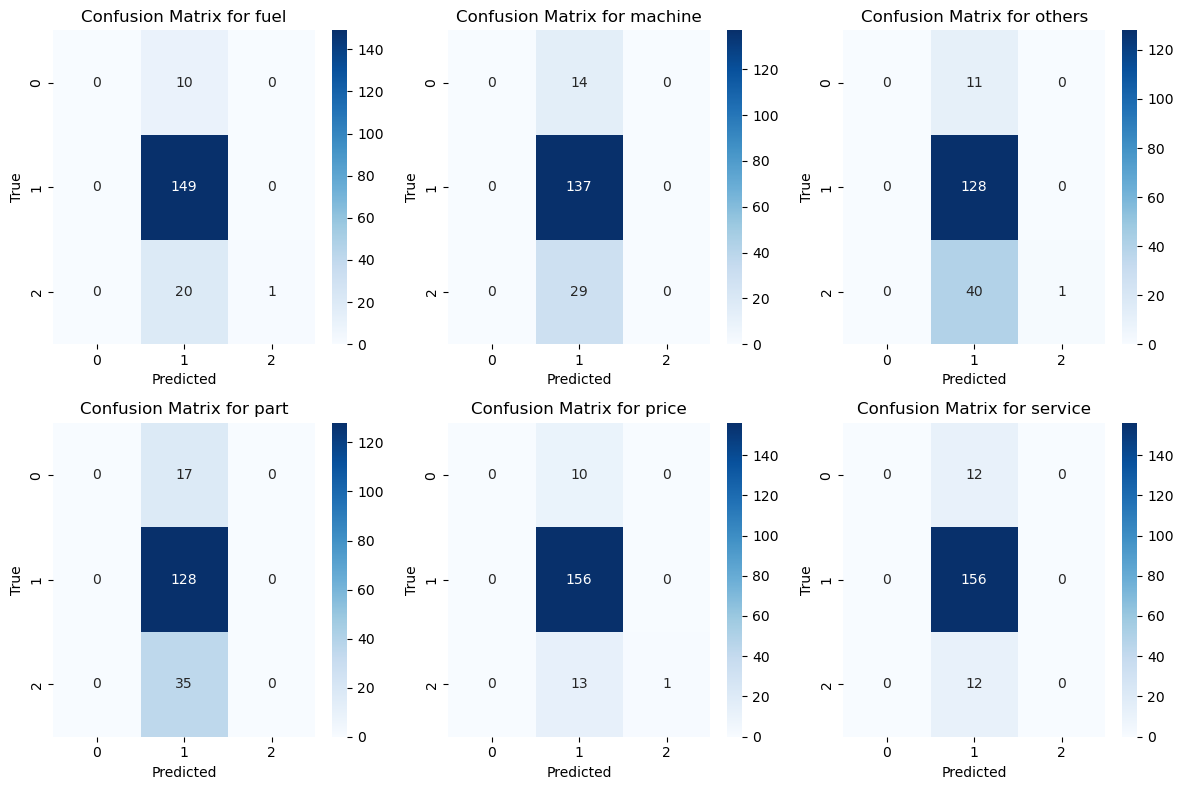

In [29]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (adjust path based on where the dataset is located)
train_data = pd.read_csv("data/train_preprocess.csv", sep=',')
test_data = pd.read_csv("data/test_preprocess.csv", sep=',')

# Define the training and testing data for features (X) and labels (y)
X_train = train_data['Sentence']
y_train_multi = train_data.drop(columns=['Sentence']).copy()
X_test = test_data['Sentence']
y_test_multi = test_data.drop(columns=['Sentence']).copy()

# Encode label columns using LabelEncoder
label_encoders = {}
for col in y_train_multi.columns:
    le = LabelEncoder()
    y_train_multi[col] = le.fit_transform(y_train_multi[col])
    y_test_multi[col] = le.transform(y_test_multi[col])
    label_encoders[col] = le

# Initialize KFold cross-validation
multi_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize results storage
result = {}

# Define the models
models = {"SVM": SVC(), "KNN": KNeighborsClassifier(), "NB": MultinomialNB()}

# Define different text transformation methods
vectorizers = {
    "Bag of Words": CountVectorizer(max_features=5000),
    "Bag of N-grams": CountVectorizer(ngram_range=(1, 3), max_features=5000),
    "TF-IDF": TfidfVectorizer(max_features=5000),
}

# Define the label columns (adjust this to match your data)
label_columns = list(y_train_multi.columns)  # Convert to list for classification_report

# Test each combination of vectorizer and classifier
for vectorizer_name, vectorizer in vectorizers.items():
    for model_name, model in models.items():
        # Use MultiOutputClassifier to handle multi-label classification
        wrapped_model = MultiOutputClassifier(model)

        # Create a pipeline for each transformation
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', wrapped_model)
        ])

        # Perform cross-validation
        scores = cross_val_score(pipeline, X_train, y_train_multi, cv=multi_kf, scoring="accuracy", n_jobs=-1)

        # Store the results
        result[f"{model_name} with {vectorizer_name}"] = scores
        print(f"{model_name} with {vectorizer_name} - Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

        # Train the model and make predictions
        pipeline.fit(X_train, y_train_multi)
        y_pred_multi = pipeline.predict(X_test)

        # Convert predictions to DataFrame
        y_pred_df = pd.DataFrame(y_pred_multi, columns=label_columns)

        # Calculate subset accuracy manually (exact match)
        subset_accuracy = np.mean(np.all(y_test_multi.values == y_pred_df.values, axis=1))
        print(f"{model_name} with {vectorizer_name} Final Subset Accuracy:", subset_accuracy)

        # Skip hamming loss calculation for multiclass-multioutput
        print(f"{model_name} with {vectorizer_name} Hamming Loss: Not supported for multiclass-multioutput labels.")

        # Print classification report per label separately to avoid multiclass-multioutput error
        print(f"{model_name} with {vectorizer_name} Classification Report:")
        for col in label_columns:
            print(f"Label: {col}")
            print(classification_report(y_test_multi[col], y_pred_df[col], zero_division=1))

        # Plot confusion matrices for each label separately
        print(f"{model_name} with {vectorizer_name} Confusion Matrices:")
        n_labels = len(label_columns)
        cols = 3
        rows = (n_labels + cols - 1) // cols  # Ceiling division to get rows needed

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
        axes = axes.flatten() if n_labels > 1 else [axes]

        for i, (ax, label) in enumerate(zip(axes, label_columns)):
            cm = confusion_matrix(y_test_multi[label], y_pred_df[label])
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
            ax.set_title(f"Confusion Matrix for {label}")
            ax.set_xlabel("Predicted")
            ax.set_ylabel("True")

        for j in range(n_labels, rows * cols):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()


Evaluating SVM with Bag of Words

Classification Reports for SVM with Bag of Words:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.88      0.99      0.93       149
           2       0.83      0.48      0.61        21

    accuracy                           0.88       180
   macro avg       0.90      0.49      0.51       180
weighted avg       0.88      0.88      0.84       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.85      1.00      0.92       137
           2       0.56      0.34      0.43        29

    accuracy                           0.82       180
   macro avg       0.80      0.45      0.45       180
weighted avg       0.81      0.82      0.77       180


Label: others
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
 

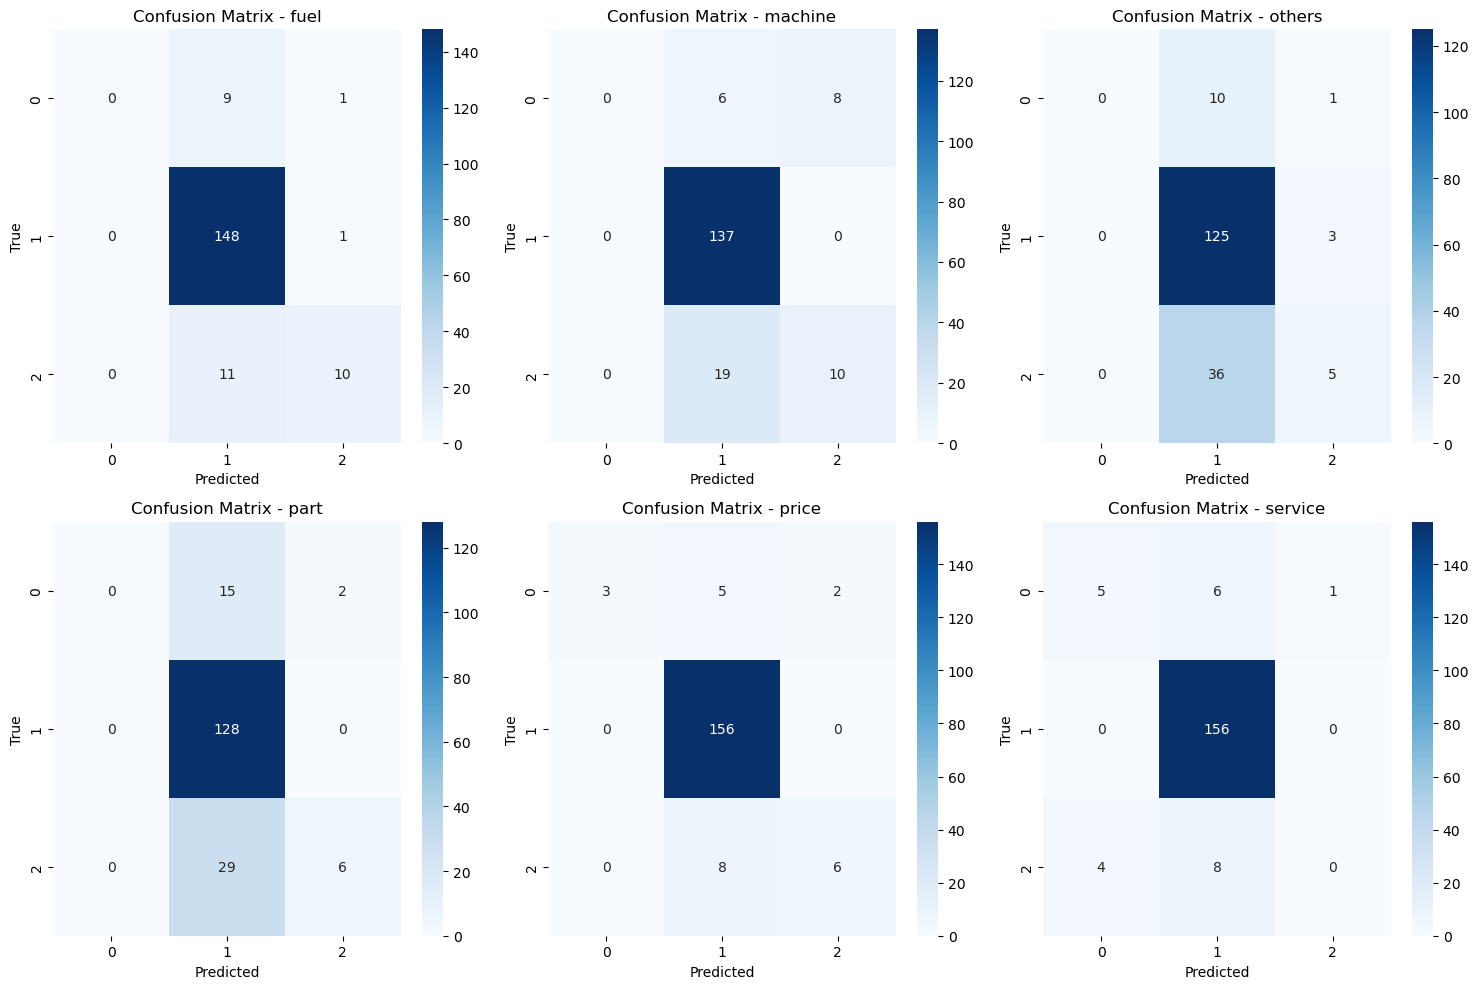

Subset Accuracy: 0.1889
Evaluating KNN with Bag of Words

Classification Reports for KNN with Bag of Words:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.85      1.00      0.92       149
           2       0.80      0.19      0.31        21

    accuracy                           0.85       180
   macro avg       0.88      0.40      0.41       180
weighted avg       0.85      0.85      0.80       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.77      1.00      0.87       137
           2       1.00      0.03      0.07        29

    accuracy                           0.78       180
   macro avg       0.92      0.39      0.40       180
weighted avg       0.83      0.78      0.69       180


Label: others
              precision    recall  f1-score   support

           0       0.25      0.

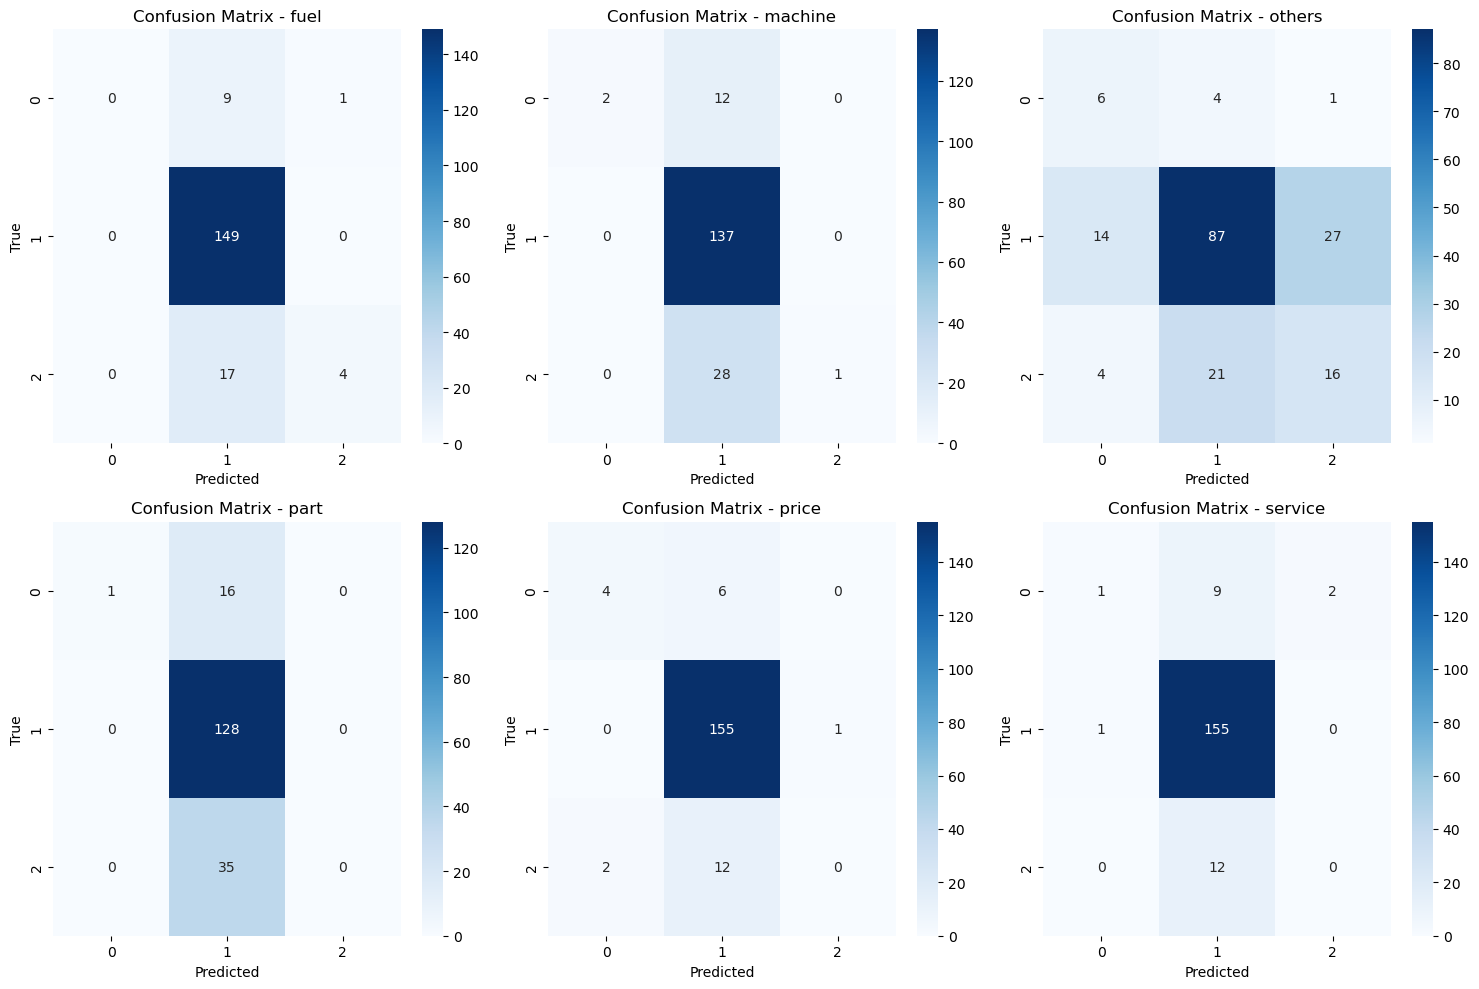

Subset Accuracy: 0.1556
Evaluating NB with Bag of Words

Classification Reports for NB with Bag of Words:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.94      0.99      0.96       149
           2       0.73      0.76      0.74        21

    accuracy                           0.91       180
   macro avg       0.89      0.59      0.57       180
weighted avg       0.92      0.91      0.88       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.88      0.98      0.92       137
           2       0.62      0.55      0.58        29

    accuracy                           0.84       180
   macro avg       0.83      0.53      0.55       180
weighted avg       0.84      0.84      0.81       180


Label: others
              precision    recall  f1-score   support

           0       1.00      0.09

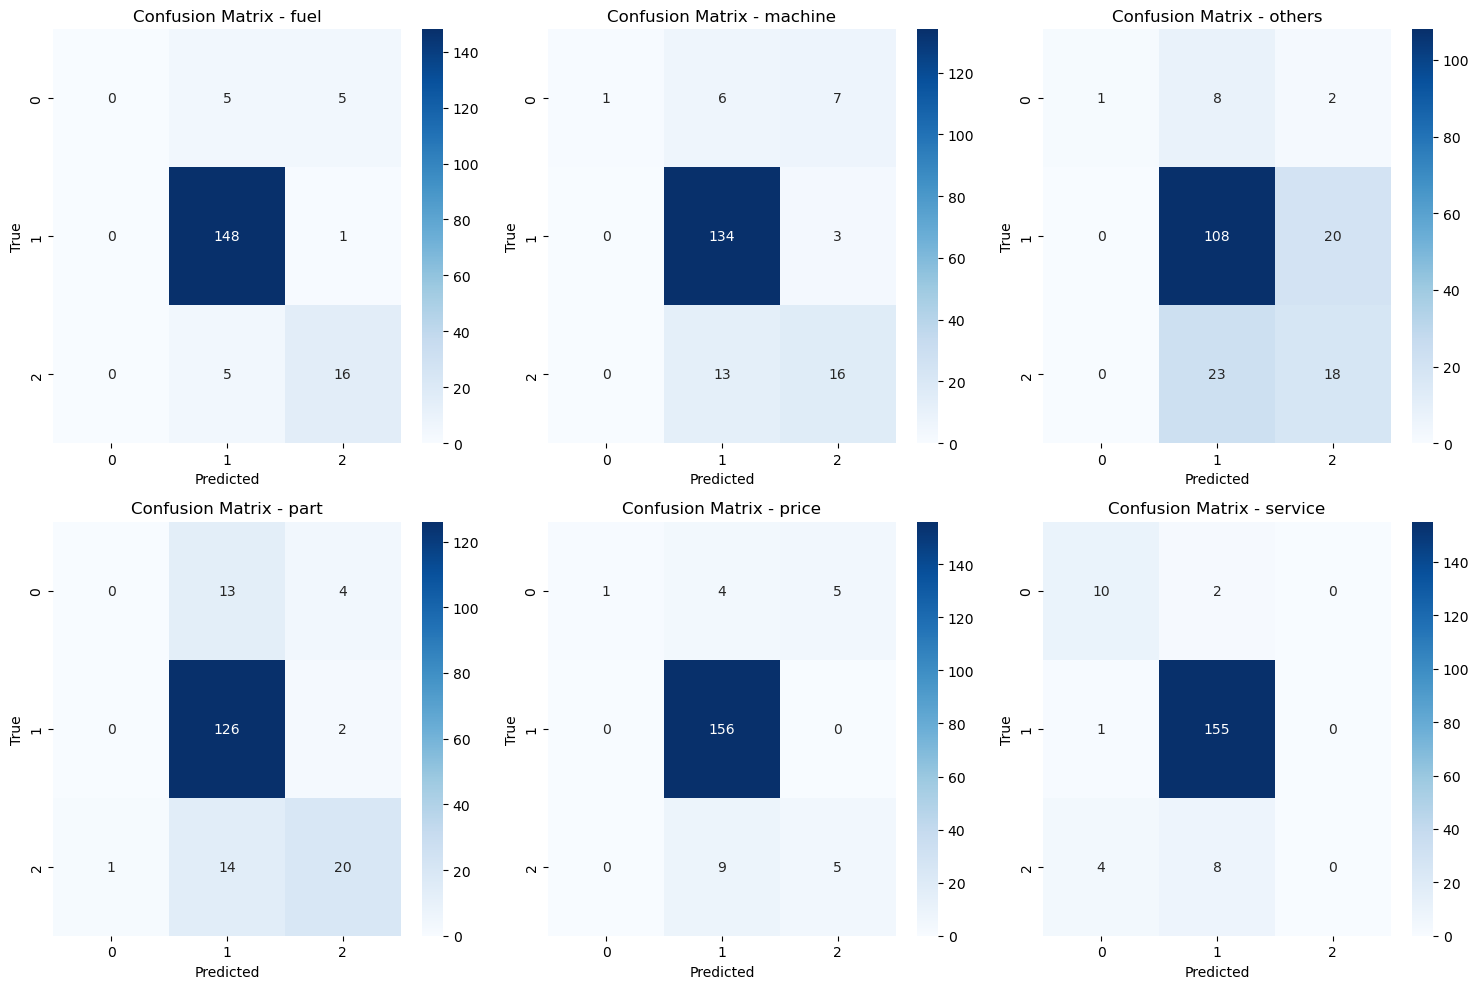

Subset Accuracy: 0.2611
Evaluating SVM with Bag of N-grams

Classification Reports for SVM with Bag of N-grams:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.87      1.00      0.93       149
           2       0.88      0.33      0.48        21

    accuracy                           0.87       180
   macro avg       0.91      0.44      0.47       180
weighted avg       0.87      0.87      0.82       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.82      1.00      0.90       137
           2       0.54      0.24      0.33        29

    accuracy                           0.80       180
   macro avg       0.79      0.41      0.41       180
weighted avg       0.79      0.80      0.74       180


Label: others
              precision    recall  f1-score   support

           0       1.00    

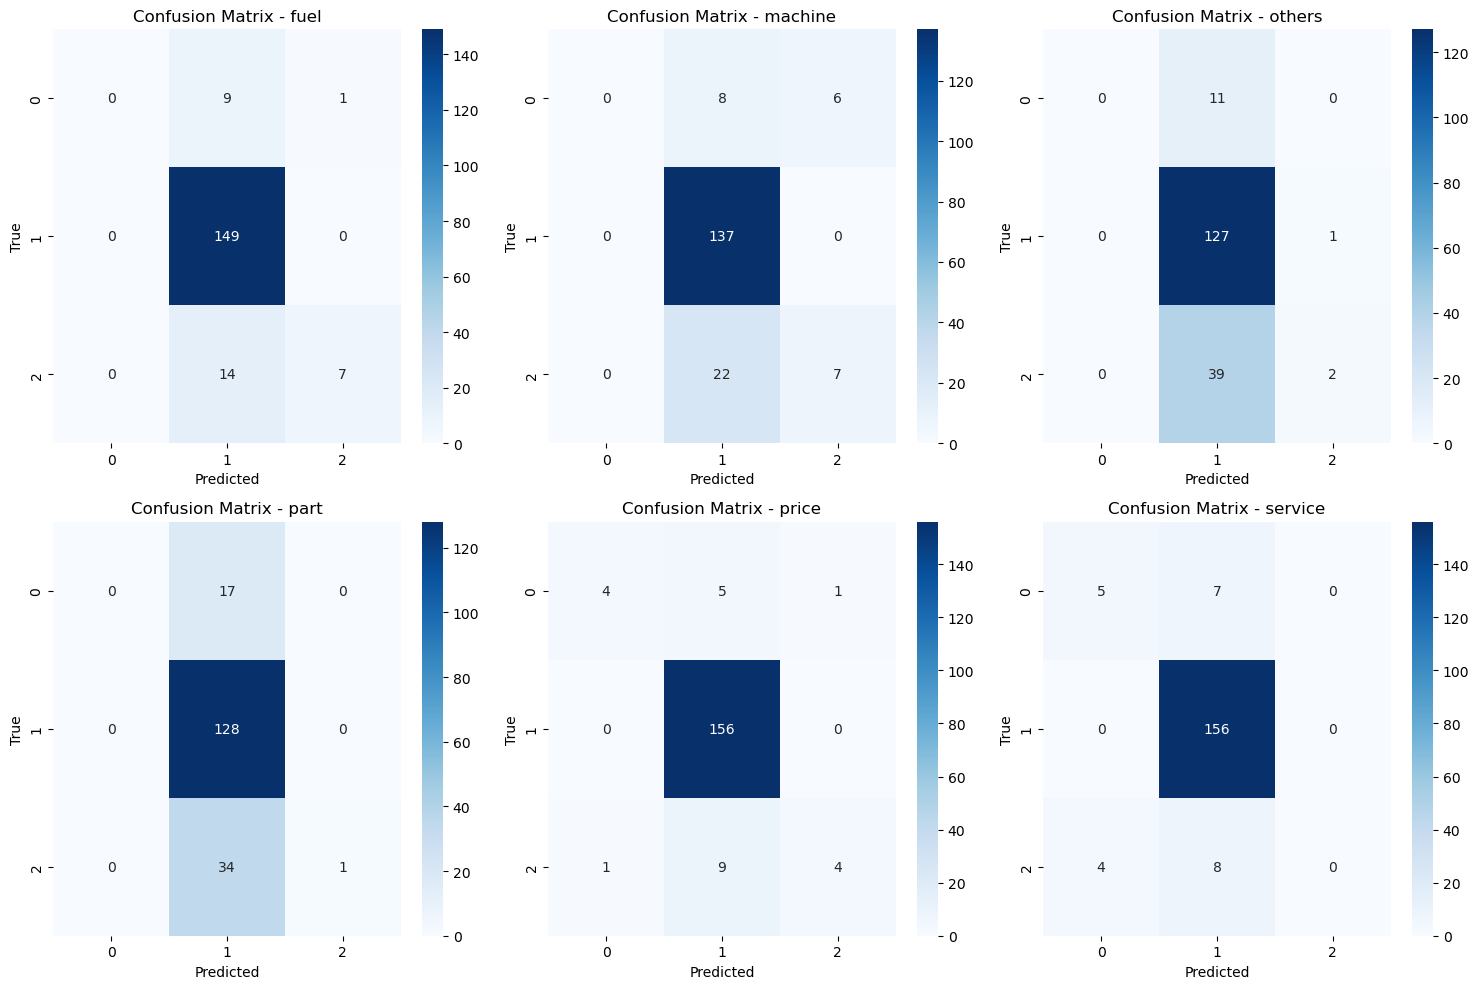

Subset Accuracy: 0.1333
Evaluating KNN with Bag of N-grams

Classification Reports for KNN with Bag of N-grams:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.84      1.00      0.91       149
           2       1.00      0.14      0.25        21

    accuracy                           0.84       180
   macro avg       0.95      0.38      0.39       180
weighted avg       0.87      0.84      0.79       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.76      1.00      0.86       137
           2       1.00      0.00      0.00        29

    accuracy                           0.76       180
   macro avg       0.92      0.33      0.29       180
weighted avg       0.82      0.76      0.66       180


Label: others
              precision    recall  f1-score   support

           0       0.14    

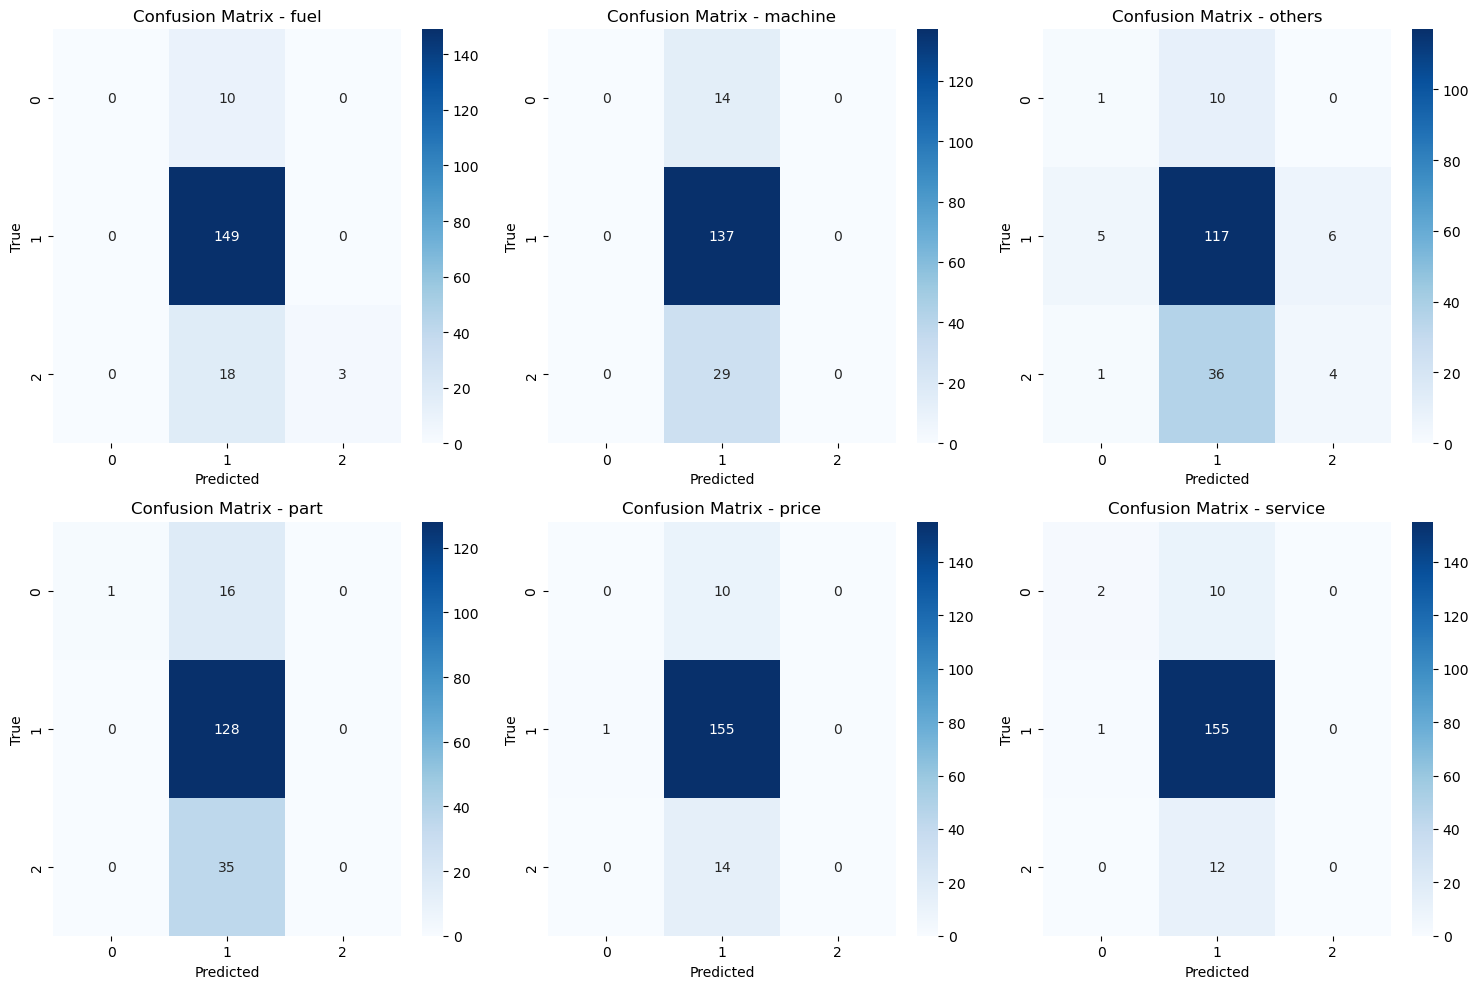

Subset Accuracy: 0.0444
Evaluating NB with Bag of N-grams

Classification Reports for NB with Bag of N-grams:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.94      0.99      0.96       149
           2       0.68      0.71      0.70        21

    accuracy                           0.91       180
   macro avg       0.87      0.60      0.61       180
weighted avg       0.91      0.91      0.89       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.86      0.99      0.92       137
           2       0.60      0.41      0.49        29

    accuracy                           0.83       180
   macro avg       0.82      0.49      0.51       180
weighted avg       0.83      0.83      0.79       180


Label: others
              precision    recall  f1-score   support

           0       1.00      

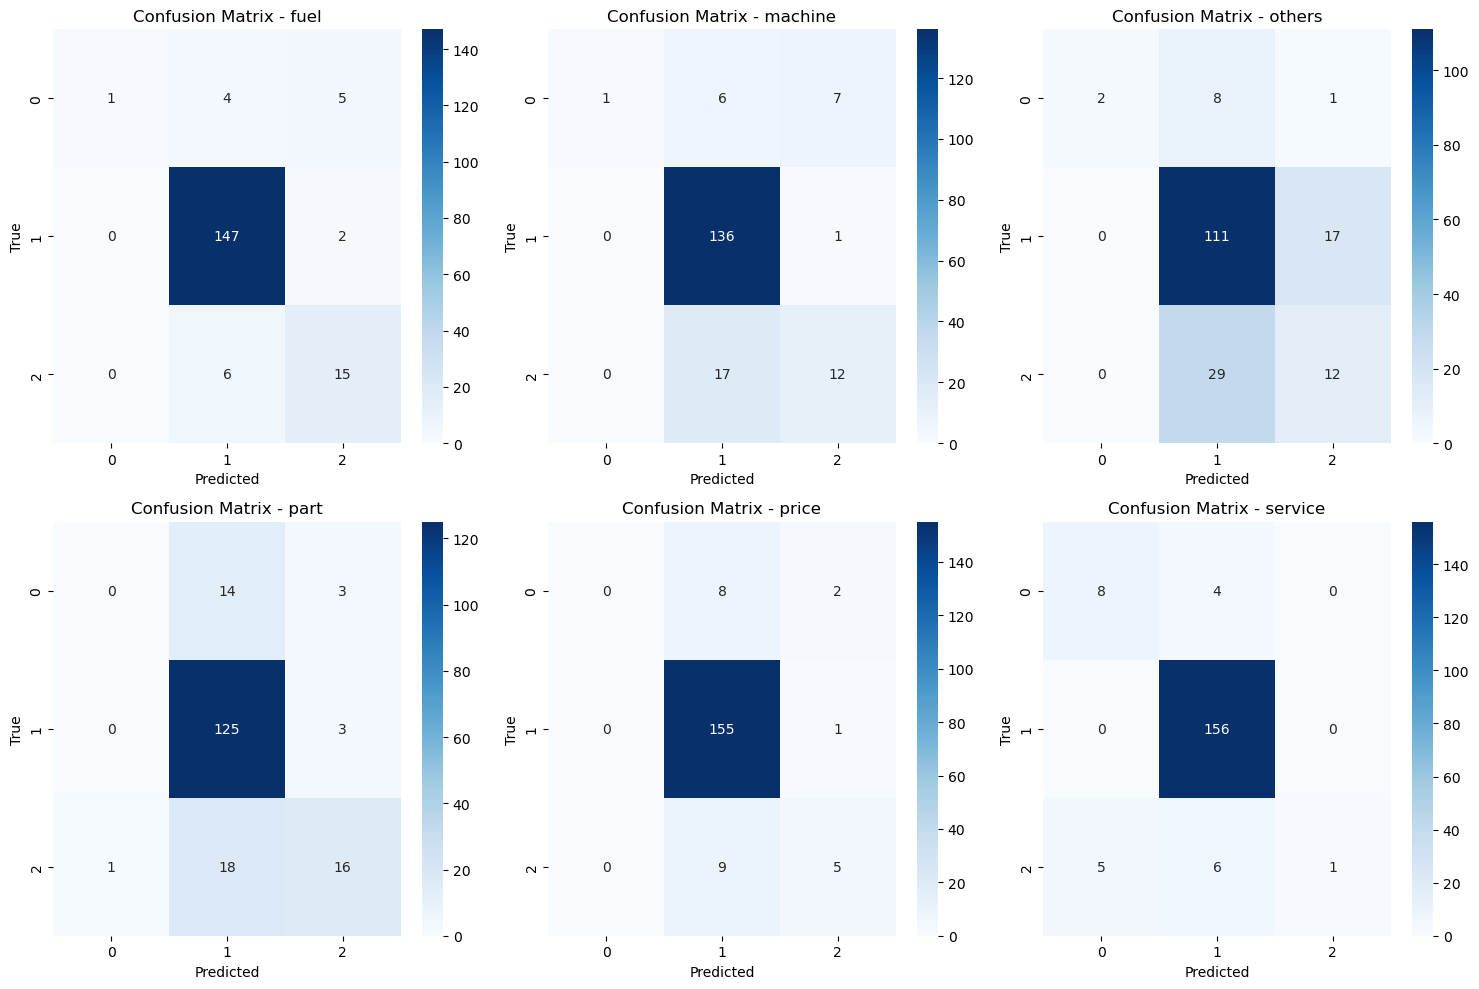

Subset Accuracy: 0.2167
Evaluating SVM with TF-IDF

Classification Reports for SVM with TF-IDF:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.88      1.00      0.93       149
           2       0.80      0.38      0.52        21

    accuracy                           0.87       180
   macro avg       0.89      0.46      0.48       180
weighted avg       0.87      0.87      0.83       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.82      1.00      0.90       137
           2       0.62      0.28      0.38        29

    accuracy                           0.81       180
   macro avg       0.81      0.43      0.43       180
weighted avg       0.80      0.81      0.75       180


Label: others
              precision    recall  f1-score   support

           0       1.00      0.09      0.17

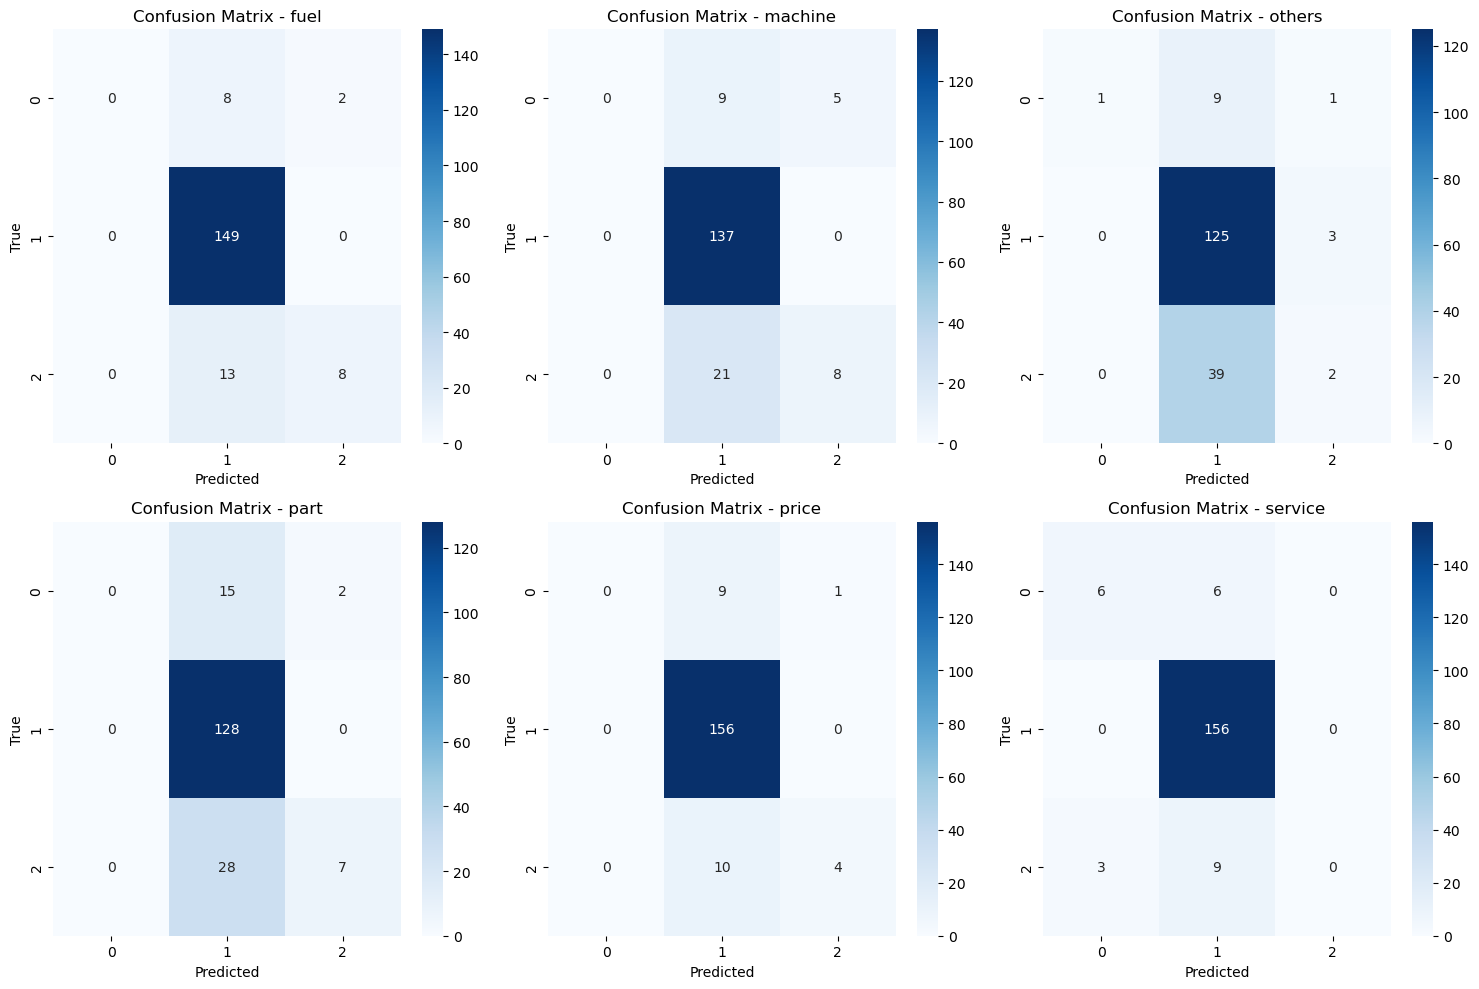

Subset Accuracy: 0.1556
Evaluating KNN with TF-IDF

Classification Reports for KNN with TF-IDF:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.89      1.00      0.94       149
           2       0.89      0.38      0.53        21

    accuracy                           0.89       180
   macro avg       0.93      0.59      0.68       180
weighted avg       0.90      0.89      0.87       180


Label: machine
              precision    recall  f1-score   support

           0       0.60      0.21      0.32        14
           1       0.80      0.98      0.88       137
           2       0.62      0.17      0.27        29

    accuracy                           0.79       180
   macro avg       0.68      0.45      0.49       180
weighted avg       0.76      0.79      0.74       180


Label: others
              precision    recall  f1-score   support

           0       0.00      0.00      0.00

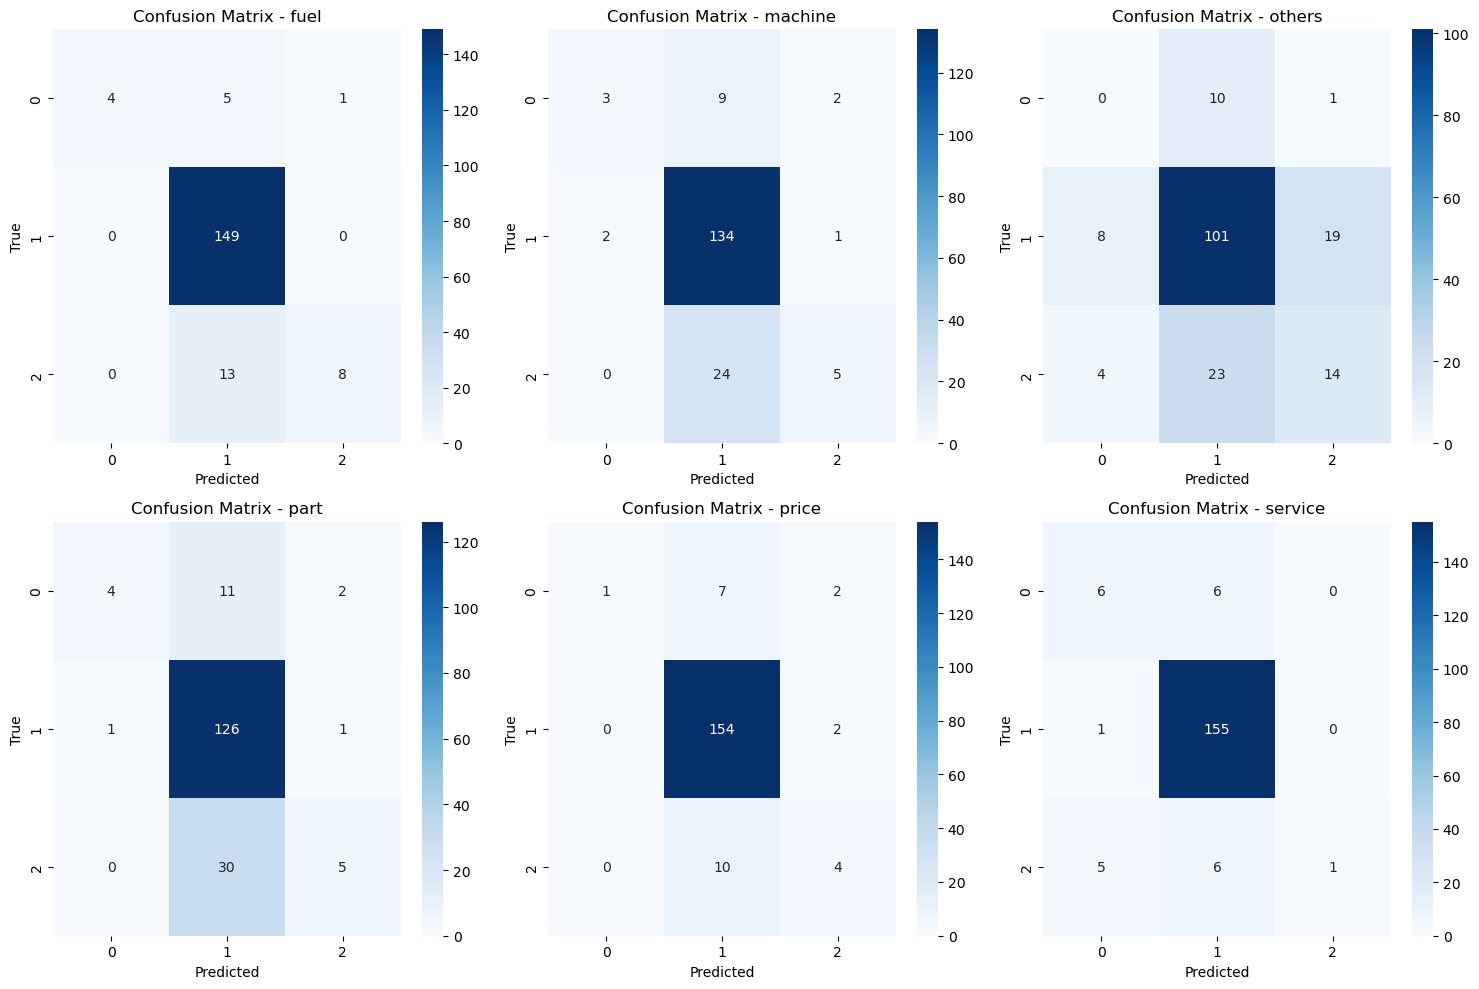

Subset Accuracy: 0.1944
Evaluating NB with TF-IDF

Classification Reports for NB with TF-IDF:

Label: fuel
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        10
           1       0.83      1.00      0.91       149
           2       1.00      0.05      0.09        21

    accuracy                           0.83       180
   macro avg       0.94      0.35      0.33       180
weighted avg       0.86      0.83      0.76       180


Label: machine
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.76      1.00      0.86       137
           2       1.00      0.00      0.00        29

    accuracy                           0.76       180
   macro avg       0.92      0.33      0.29       180
weighted avg       0.82      0.76      0.66       180


Label: others
              precision    recall  f1-score   support

           0       1.00      0.00      0.00  

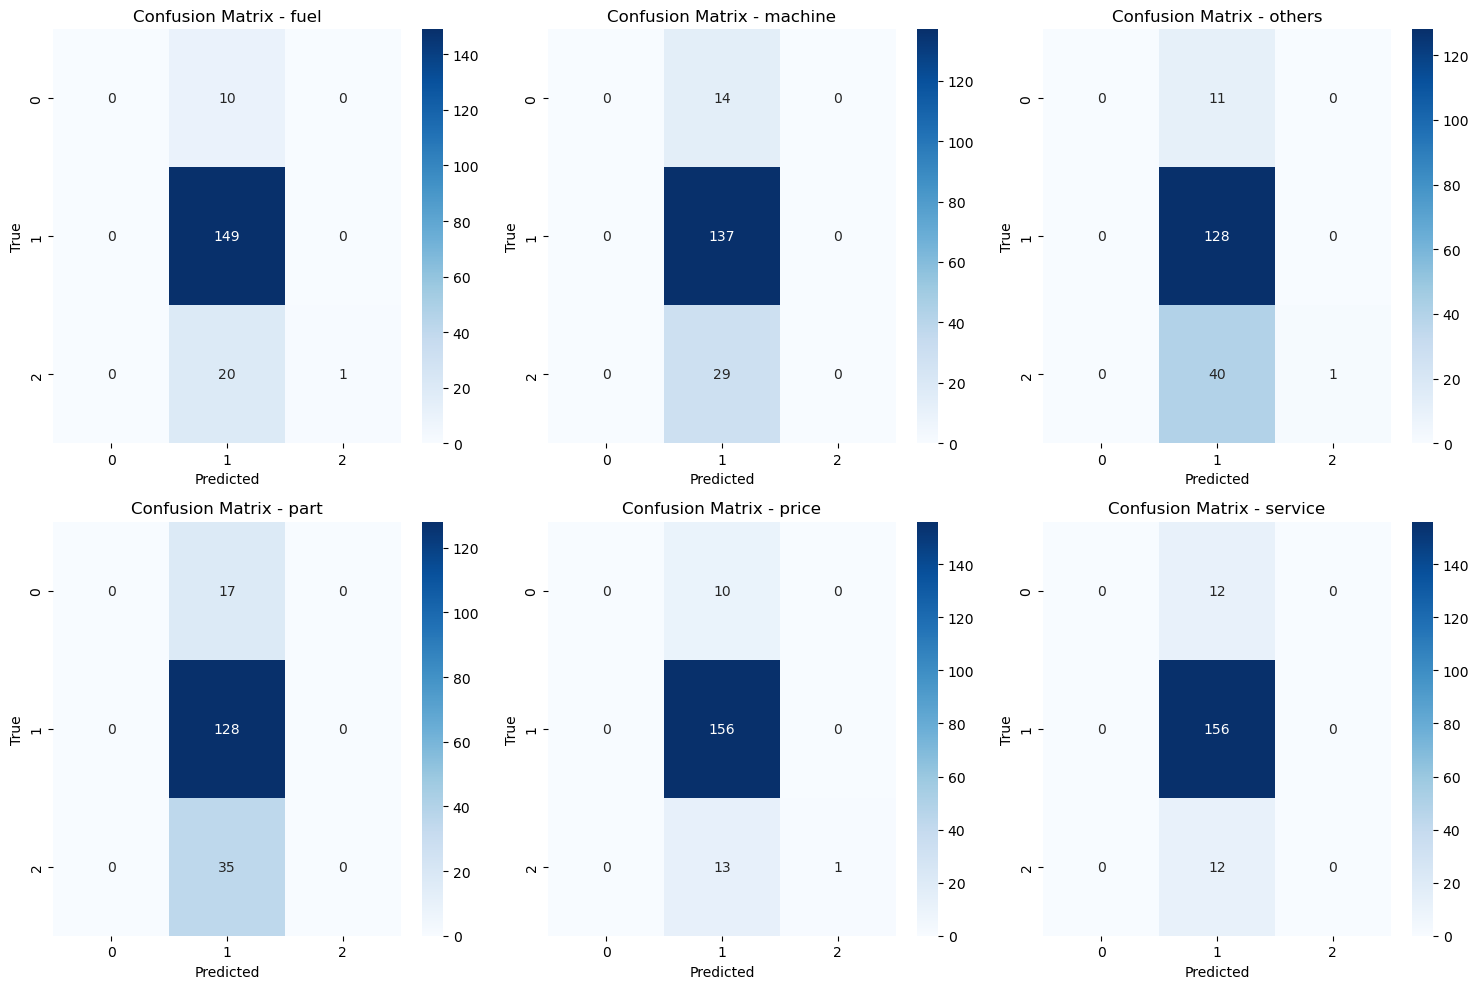

Subset Accuracy: 0.0167


In [30]:
# Define storage for all evaluation results
evaluation_results = {}

# Loop semua kombinasi vectorizer + model
for vectorizer_name, vectorizer in vectorizers.items():
    for model_name, model in models.items():
        print("="*80)
        print(f"Evaluating {model_name} with {vectorizer_name}")

        # Wrap model untuk multi-output
        wrapped_model = MultiOutputClassifier(model)
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', wrapped_model)
        ])

        # Train model
        pipeline.fit(X_train, y_train_multi)
        
        # Predict
        y_pred_multi = pipeline.predict(X_test)
        y_pred_df = pd.DataFrame(y_pred_multi, columns=label_columns)

        # Save prediction dataframe
        evaluation_results[f"{model_name} with {vectorizer_name}"] = {
            "predictions": y_pred_df
        }

        # Classification report for each label
        reports = {}
        print(f"\nClassification Reports for {model_name} with {vectorizer_name}:")
        for label in label_columns:
            report = classification_report(
                y_test_multi[label], 
                y_pred_df[label], 
                output_dict=True, 
                zero_division=1
            )
            reports[label] = report
            print(f"\nLabel: {label}")
            print(classification_report(
                y_test_multi[label], 
                y_pred_df[label], 
                zero_division=1
            ))

        evaluation_results[f"{model_name} with {vectorizer_name}"]["classification_reports"] = reports

        # Confusion matrix
        n_labels = len(label_columns)
        cols = 3
        rows = (n_labels + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
        axes = axes.flatten()

        for idx, label in enumerate(label_columns):
            cm = confusion_matrix(y_test_multi[label], y_pred_df[label])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
            axes[idx].set_title(f'Confusion Matrix - {label}')
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('True')

        for idx in range(len(label_columns), len(axes)):
            fig.delaxes(axes[idx])  # Remove empty subplot
        plt.tight_layout()
        plt.show()

        # Calculate subset accuracy
        subset_accuracy = np.mean(np.all(y_test_multi.values == y_pred_df.values, axis=1))
        evaluation_results[f"{model_name} with {vectorizer_name}"]["subset_accuracy"] = subset_accuracy

        print(f"Subset Accuracy: {subset_accuracy:.4f}")


In [31]:
# Summarize all models
summary_data = []
for model_vectorizer, results in evaluation_results.items():
    summary_data.append({
        "Model": model_vectorizer,
        "Subset Accuracy": results['subset_accuracy']
    })

summary_df = pd.DataFrame(summary_data).sort_values(by="Subset Accuracy", ascending=False)
print(summary_df)

                     Model  Subset Accuracy
2     NB with Bag of Words         0.261111
5   NB with Bag of N-grams         0.216667
7          KNN with TF-IDF         0.194444
0    SVM with Bag of Words         0.188889
1    KNN with Bag of Words         0.155556
6          SVM with TF-IDF         0.155556
3  SVM with Bag of N-grams         0.133333
4  KNN with Bag of N-grams         0.044444
8           NB with TF-IDF         0.016667
